In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df1=pd.read_csv('Users.csv', encoding='latin-1')
df2=pd.read_csv('Ratings.csv', encoding='latin-1')
df3=pd.read_csv('Books.csv', encoding='latin-1')

/var/folders/sp/306bd6rs1b3gxdslbctknktw0000gn/T/ipykernel_4198/325444545.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df3=pd.read_csv('Books.csv', encoding='latin-1')


In [ ]:
df1

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [ ]:
df2

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [ ]:
# del all the index where rating is non numeric value

df2 = df2[pd.to_numeric(df2['Book-Rating'], errors='coerce').notnull()]


In [ ]:
df3.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
df1.shape

(278858, 3)

In [ ]:
df2.shape

(1149780, 3)

In [ ]:
df3.shape

(271360, 8)

In [ ]:
#Meging user and rating  data set on the basis of user id
df4=pd.merge(df1,df2,on='User-ID', how='inner')

In [ ]:
df4.head()

,User-ID,Location,Age,ISBN,Book-Rating
0,2,"stockton, california, usa",18.0,0195153448,0
1,7,"washington, dc, usa",NaN,034542252,0
2,8,"timmins, ontario, canada",NaN,0002005018,5
3,8,"timmins, ontario, canada",NaN,0060973129,0
4,8,"timmins, ontario, canada",NaN,0374157065,0


<Axes: >

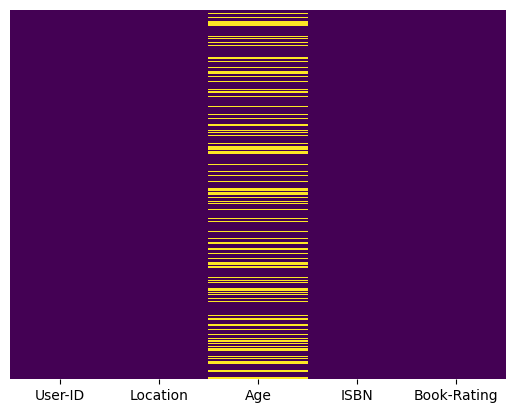

In [ ]:
#checking with heat map
sns.heatmap(df4.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#filling the null values in age column
df4['Age'] = df4['Age'].fillna(df4['Age'].mean()).astype(int)

In [ ]:
df4.head()

,User-ID,Location,Age,ISBN,Book-Rating
0,2,"stockton, california, usa",18,0195153448,0
1,7,"washington, dc, usa",37,034542252,0
2,8,"timmins, ontario, canada",37,0002005018,5
3,8,"timmins, ontario, canada",37,0060973129,0
4,8,"timmins, ontario, canada",37,0374157065,0


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
df3.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [ ]:
# deleting  the whole index where i have the null values in my data

df3 = df3.dropna(axis=0, how='any')

In [ ]:
df3.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [ ]:
#merging the df4 and df3 data set
df5 = pd.merge(df4,df3, on='ISBN', how='inner')


In [ ]:
df5.head()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,2,"stockton, california, usa",18,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,8,"timmins, ontario, canada",37,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,11400,"ottawa, ontario, canada",49,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
3,11676,"n/a, n/a, n/a",37,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
4,41385,"sudbury, ontario, canada",37,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [ ]:
df5.isnull().sum()

User-ID                0
Location               0
Age                    0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

#This is our Final merging Data Set


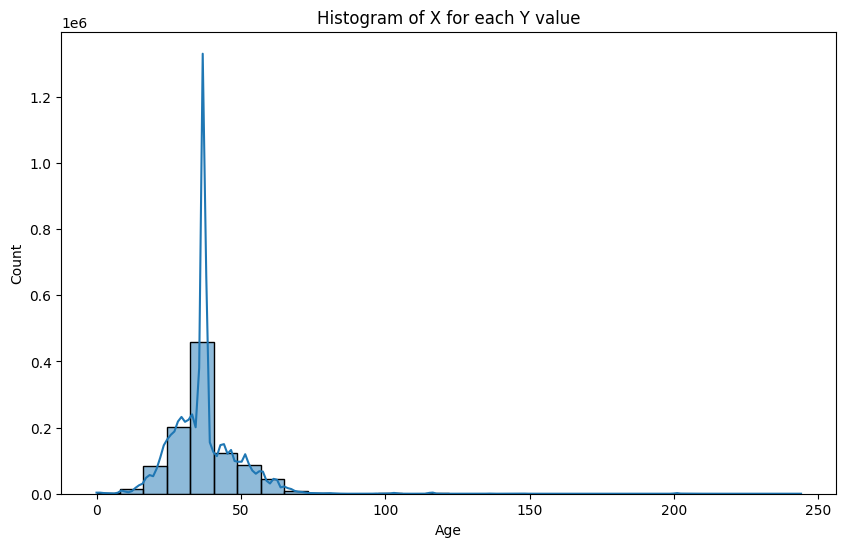

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Age', data=df5, bins=30, kde=True)
plt.title('Histogram of X for each Y value')
plt.show()

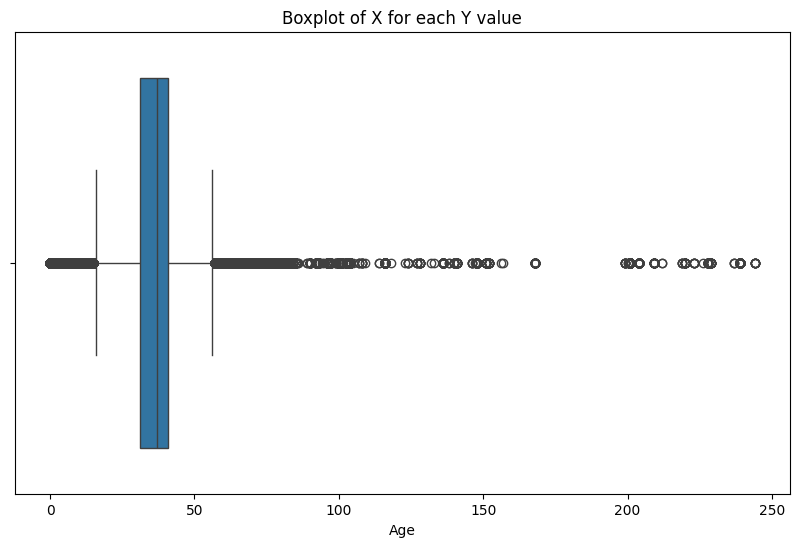

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', data=df5)
plt.title('Boxplot of X for each Y value')
plt.show()

Before Winsorization:
count    1.031128e+06
mean     3.729052e+01
std      1.205142e+01
min      0.000000e+00
25%      3.100000e+01
50%      3.700000e+01
75%      4.100000e+01
max      2.440000e+02
Name: Age, dtype: float64

After Winsorization:
count    1.031128e+06
mean     3.679830e+01
std      9.449249e+00
min      1.700000e+01
25%      3.100000e+01
50%      3.700000e+01
75%      4.100000e+01
max      5.600000e+01
Name: Age_winsorized, dtype: float64


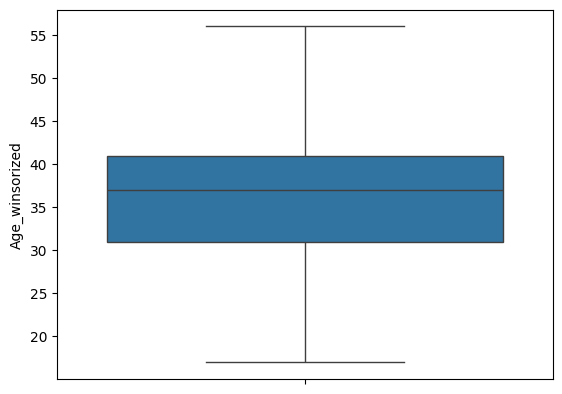

In [ ]:
#removing the outliers from the age column
# Define the percentile range for Winsorization
lower_percentile = 2# Lower percentile
upper_percentile =94 # Upper percentile


# Compute the lower and upper bounds for Winsorization
lower_bound = np.percentile(df5['Age'], lower_percentile)
upper_bound = np.percentile(df5['Age'], upper_percentile)

# Apply Winsorization to the variable with outliers
df5['Age' + '_winsorized'] = df5['Age'].clip(lower=lower_bound, upper=upper_bound)

# Check the effect of Winsorization
print("Before Winsorization:")
print(df5['Age'].describe())

print("\nAfter Winsorization:")
print(df5['Age' + '_winsorized'].describe())


sns.boxplot(df5['Age' + '_winsorized'])


df5['Age']=  df5['Age' + '_winsorized']

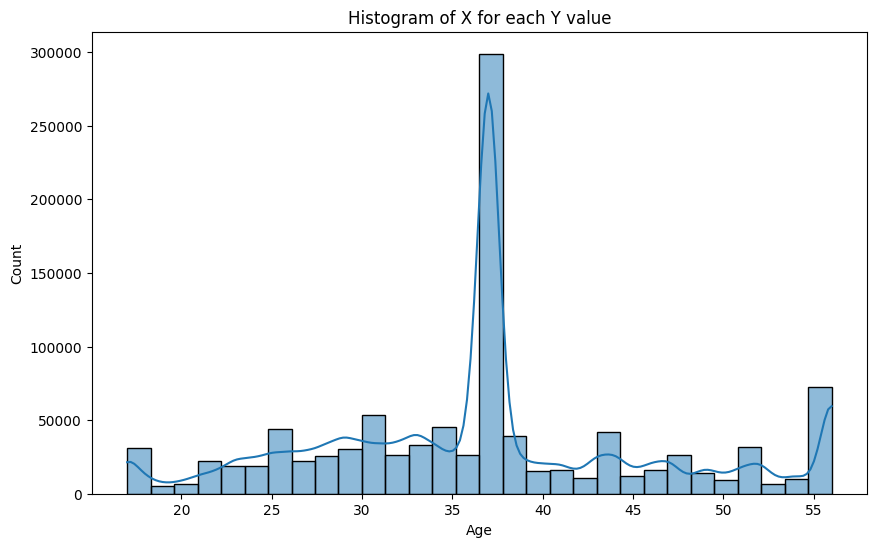

In [ ]:
#checking the histogram after removing the outliers
plt.figure(figsize=(10, 6))
sns.histplot(x='Age', data=df5, bins=30, kde=True)
plt.title('Histogram of X for each Y value')
plt.show()

In [ ]:
#Is there any duplicate values   there or not in df5 data

df5.duplicated().sum()


0

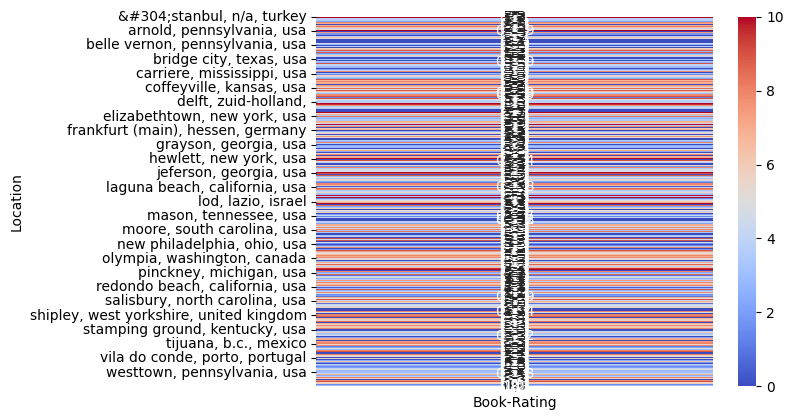

In [ ]:
#creating  a heat map to see the avaerage rating by loaction


# Create a pivot table to calculate the average rating for each location
pivot_table = df5.pivot_table(values='Book-Rating', index='Location', aggfunc='mean')

# Create a heatmap
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.show()


Top 5 most repeated locations:
Location
toronto, ontario, canada    14782
n/a, n/a, n/a               11162
chicago, illinois, usa       8499
seattle, washington, usa     8392
ottawa, ontario, canada      8116
Name: count, dtype: int64


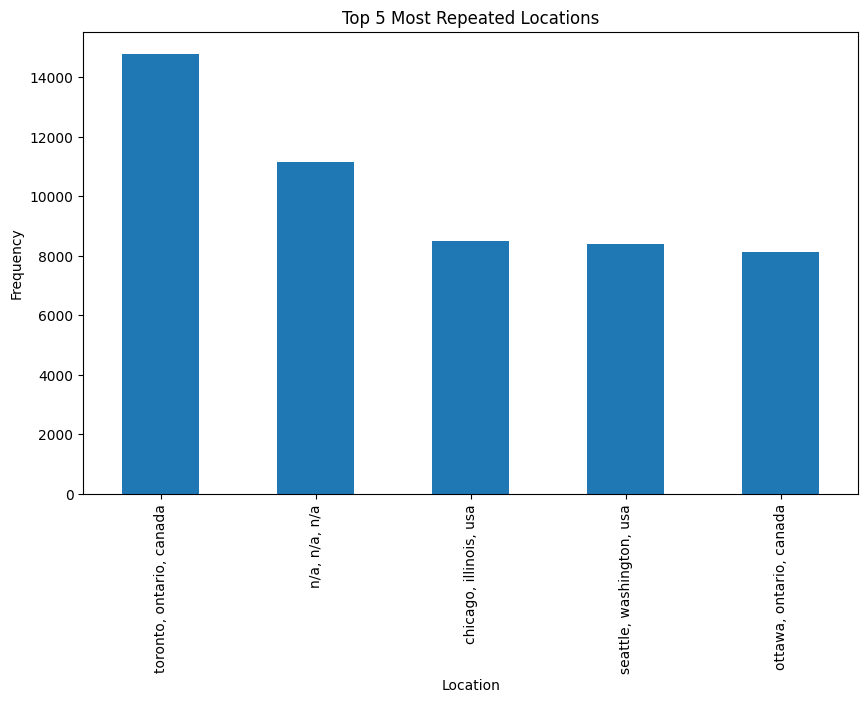

In [ ]:
# code for most repeated  top 5 locations and its bar plot view

# Most repeated top 5 locations
top_5_locations = df5['Location'].value_counts().head(5)

# Print the top 5 locations
print("Top 5 most repeated locations:")
print(top_5_locations)

# Create a bar chart of the top 5 locations
plt.figure(figsize=(10, 6))
top_5_locations.plot(kind='bar')
plt.title('Top 5 Most Repeated Locations')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.show()

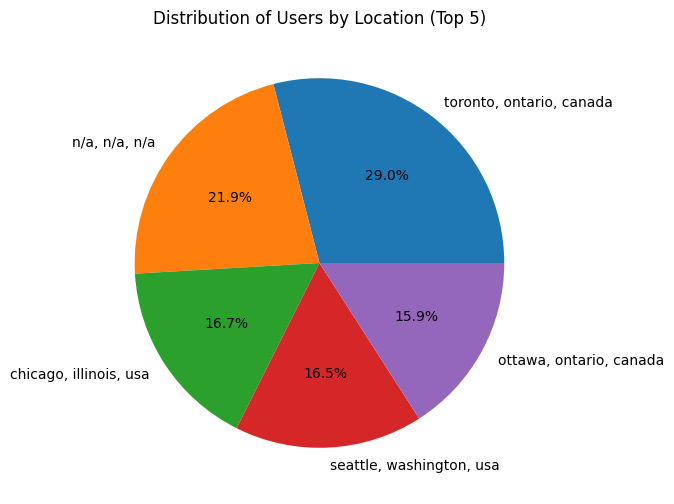

In [ ]:
#  creating a pie chart on location column to show dirstribution of userid(top5)
# Create a new DataFrame with the location and count of users
location_counts = df5.groupby('Location')['User-ID'].count().reset_index(name='Count')

# Select the top 5 locations
top_5_locations = location_counts.sort_values(by='Count', ascending=False).head(5)

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(top_5_locations['Count'], labels=top_5_locations['Location'], autopct='%1.1f%%')
plt.title('Distribution of Users by Location (Top 5)')
plt.show()

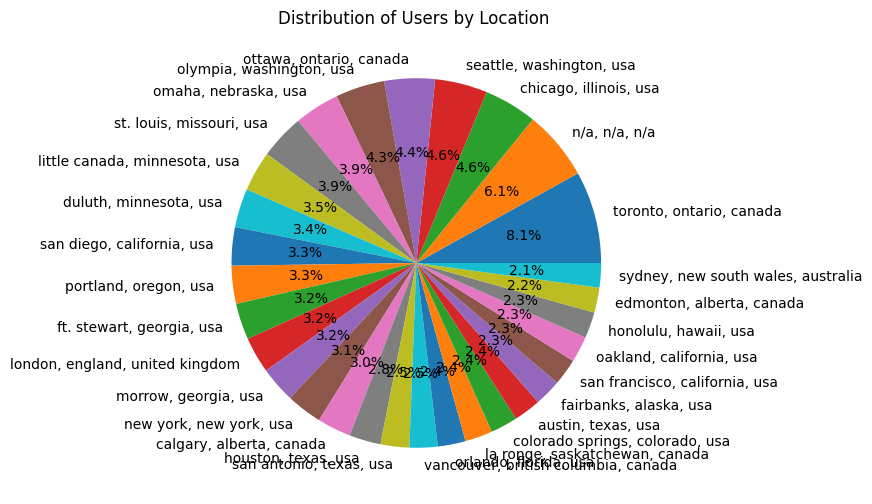

In [ ]:
# For top 30 location
# Create a new DataFrame with the location and count of users
location_counts = df5.groupby('Location')['User-ID'].count().reset_index(name='Count')

# Select the top 5 locations
locations = location_counts.sort_values(by='Count', ascending=False).head(30)

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(locations['Count'], labels=locations['Location'], autopct='%1.1f%%')
plt.title('Distribution of Users by Location ')
plt.show()


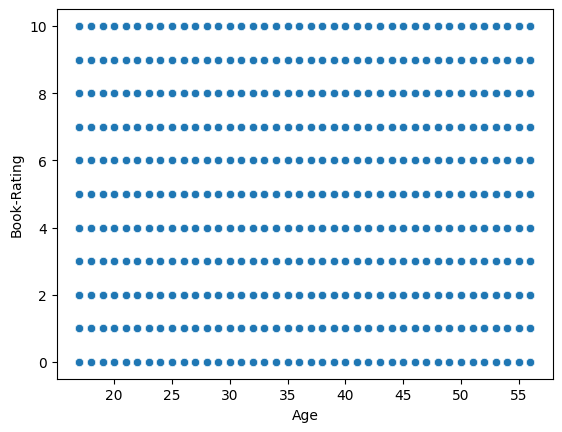

In [ ]:
# showing  the Scatter plot to see  the relationship between  Age and Book-Rating.

sns.scatterplot(x='Age', y='Book-Rating', data=df5)
plt.show()


<Figure size 1000x600 with 0 Axes>

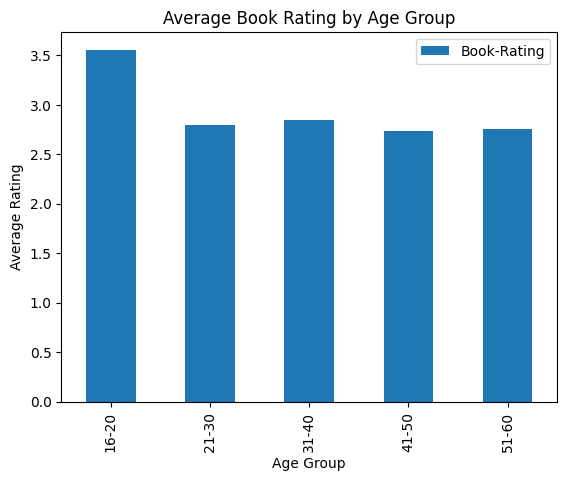

In [ ]:
# createing  bar plot showing average book ratings by age group wise

# Create an age group column
df5['Age'] = pd.cut(df5['Age'], bins=[16, 20, 30, 40, 50, 60, 70, 80], labels=['16-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80'])

# Create a pivot table to calculate the average rating for each age group
pivot_table = df5.pivot_table(values='Book-Rating', index='Age', aggfunc='mean')

# Create a bar plot
plt.figure(figsize=(10, 6))
pivot_table.plot(kind='bar')
plt.title('Average Book Rating by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Rating')
plt.show()


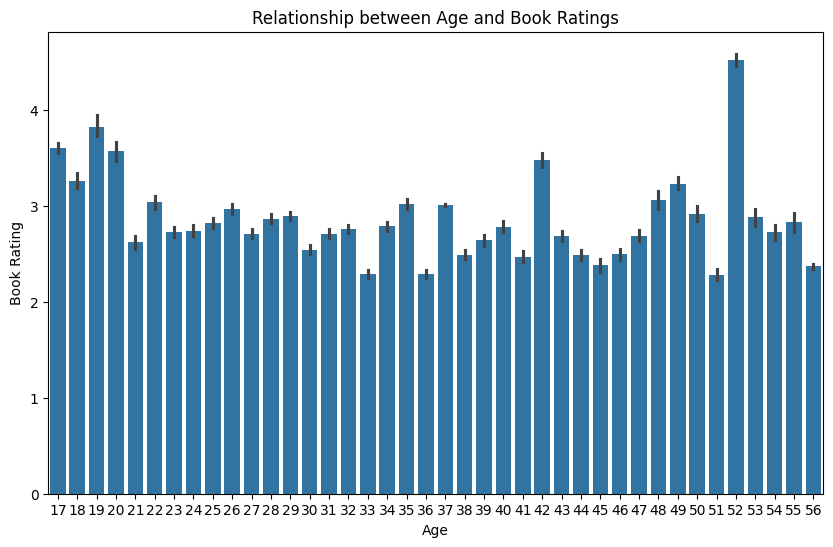

In [ ]:
#  creating  a bar graph to see the relationship between Age and Book Ratings:

plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Book-Rating', data=df5)
plt.title('Relationship between Age and Book Ratings')
plt.xlabel('Age')
plt.ylabel('Book Rating')
plt.show()

                  Age  Book-Rating
Age          1.000000    -0.020118
Book-Rating -0.020118     1.000000


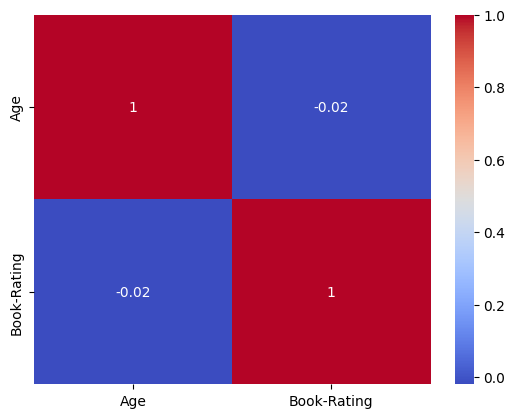

In [ ]:
# creating correlation matrix showing the correlation between Age and Book-Rating

# Calculate the correlation coefficient between Age and Book-Rating
correlation = df5['Age'].corr(df5['Book-Rating'])

# Create a correlation matrix
correlation_matrix = df5[['Age', 'Book-Rating']].corr()

# Display the correlation matrix
print(correlation_matrix)

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


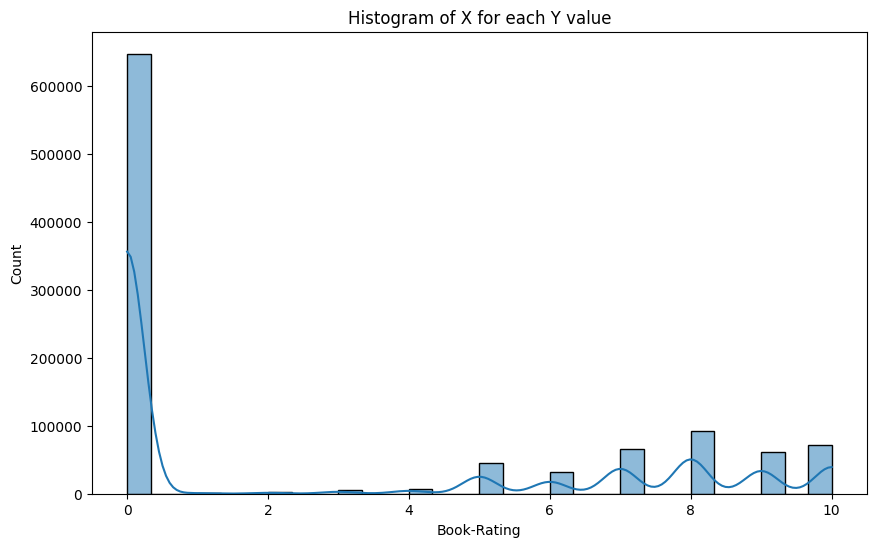

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Book-Rating', data=df5, bins=30, kde=True)
plt.title('Histogram of X for each Y value')
plt.show()

<Axes: xlabel='Book-Rating'>

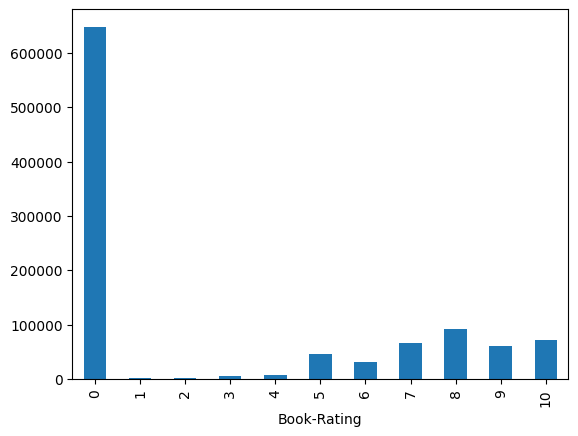

In [ ]:
# Plotting the rating in the barplot
df5['Book-Rating'].value_counts().sort_index().plot(kind='bar')

In [ ]:
# Number of Ratings and counts
df5['Book-Rating'].value_counts().sort_index()

Book-Rating
0     647291
1       1481
2       2375
3       5118
4       7617
5      45355
6      31687
7      66401
8      91803
9      60776
10     71224
Name: count, dtype: int64

In [ ]:
#most repeated user id and how many times its repeated
most_repeated_user_id = df5['User-ID'].value_counts().idxmax()
number_of_times_repeated = df5['User-ID'].value_counts().max()

print(f"Most repeated User-ID: {most_repeated_user_id}")
print(f"Number of times repeated: {number_of_times_repeated}")

Most repeated User-ID: 11676
Number of times repeated: 11144


In [ ]:
#cheking which books got 0 rating
df5[df5['Book-Rating']==0]['ISBN'].unique()

array(['0195153448', '0002005018', '0060973129', ..., '0028630289',
       '0312266448', '0743203763'], dtype=object)

In [ ]:
df5[df5['Book-Rating']==0]['ISBN'].value_counts()

ISBN
0971880107    1921
0316666343     588
0060928336     412
0385504209     396
044023722X     366
              ... 
8433930060       1
8478091211       1
8434411857       1
8425334454       1
0743203763       1
Name: count, Length: 201620, dtype: int64

In [ ]:
#cheking which books got 8 rating
df5[df5['Book-Rating']==8]['ISBN'].unique()

array(['0002005018', '0060973129', '0374157065', ..., '3492223710',
       '1550390961', '0670528951'], dtype=object)

In [ ]:
df5[df5['Book-Rating']==8]['ISBN'].value_counts()

ISBN
0316666343    188
0446672211     96
0060928336     94
0385504209     88
044023722X     86
             ... 
0895948710      1
1875137955      1
0312039328      1
0312114079      1
0670528951      1
Name: count, Length: 51143, dtype: int64

In [ ]:
#  those user id and isbn no  where  age is greater then 45

df5[df5['Age'] > 45][['User-ID', 'ISBN']]


,User-ID,ISBN
2,11400,0002005018
13,219008,0002005018
16,2954,0060973129
19,35704,0374157065
20,83160,0374157065
...,...,...
1030021,278411,0446608831
1031089,278621,1550390961
1031103,278668,8408044079
1031104,278713,0670528951


In [ ]:
#   the most popular isbn no

most_popular_isbn = df5['ISBN'].value_counts().idxmax()
print(f"Most popular ISBN: {most_popular_isbn}")

Most popular ISBN: 0971880107


In [ ]:
#showing  the book titel and book author of this isbn no-0971880107

book_title = df3[df3['ISBN'] == '0971880107']['Book-Title'].values[0]
book_author = df3[df3['ISBN'] == '0971880107']['Book-Author'].values[0]

print(f"Book title: {book_title}")
print(f"Book author: {book_author}")


Book title: Wild Animus
Book author: Rich Shapero


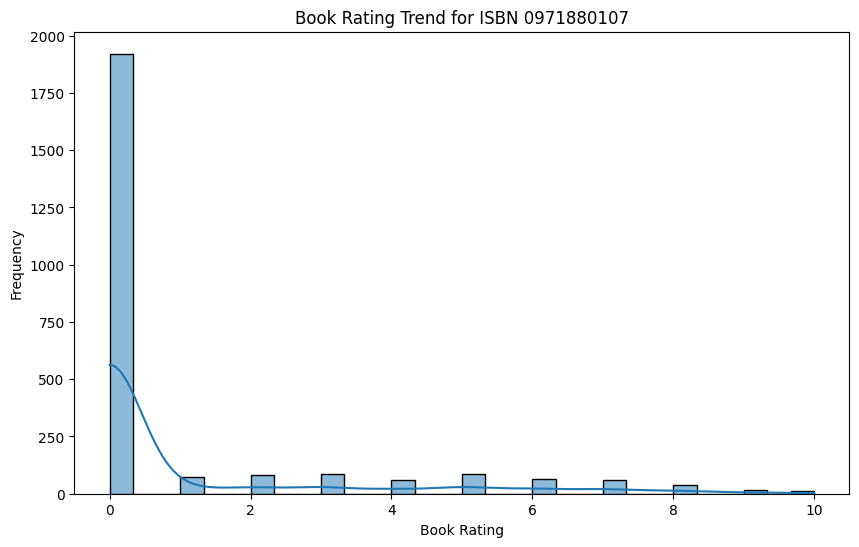

Number of times the book is rated: 2502


In [ ]:
# Showing the book-rating trend in graph of  the isbn no-0971880107  and how many time its repeated

# Create a new DataFrame for the book with ISBN '0971880107'
df_book = df5[df5['ISBN'] == '0971880107']

# Plot the book rating trend
plt.figure(figsize=(10, 6))
sns.histplot(x='Book-Rating', data=df_book, bins=30, kde=True)
plt.title('Book Rating Trend for ISBN 0971880107')
plt.xlabel('Book Rating')
plt.ylabel('Frequency')
plt.show()

# Count the number of times the book is rated
num_ratings = df_book['Book-Rating'].count()

print(f"Number of times the book is rated: {num_ratings}")


In [ ]:
#most repeated user id and how many times its repeated
most_repeated_user_id = df5['User-ID'].value_counts().idxmax()
number_of_times_repeated = df5['User-ID'].value_counts().max()

print(f"Most repeated User-ID: {most_repeated_user_id}")
print(f"Number of times repeated: {number_of_times_repeated}")

Most repeated User-ID: 11676
Number of times repeated: 11144


<ipython-input-76-435c608a8152>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratings_count.index, y=ratings_count.values, palette='Set2')


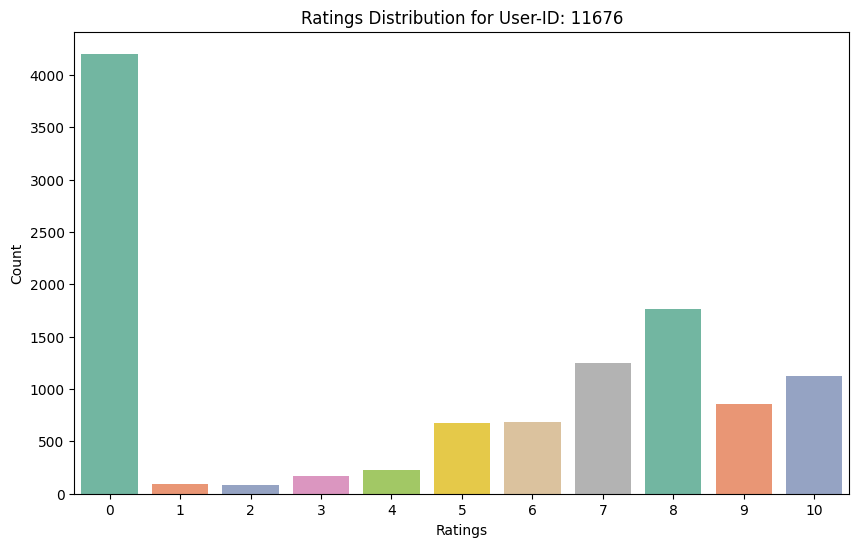

In [ ]:
# code  for this User-ID: 11676 give  rating and its graphical view
user_ratings = df5[df5['User-ID'] == 11676]
ratings_count = user_ratings['Book-Rating'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=ratings_count.index, y=ratings_count.values, palette='Set2')
plt.title('Ratings Distribution for User-ID: 11676')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [ ]:
#code for least repeated user-id
least_repeated_user_id= df5['User-ID'].value_counts().idxmin()
number_of_times_repeated= df5['User-ID'].value_counts().min()

print(f"Least repeated User-ID: {least_repeated_user_id}")
print(f"Number of times repeated: {number_of_times_repeated}")

Least repeated User-ID: 196578
Number of times repeated: 1


<ipython-input-79-6adaa0efcf76>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratings_count.index, y=ratings_count.values, palette='Set2')


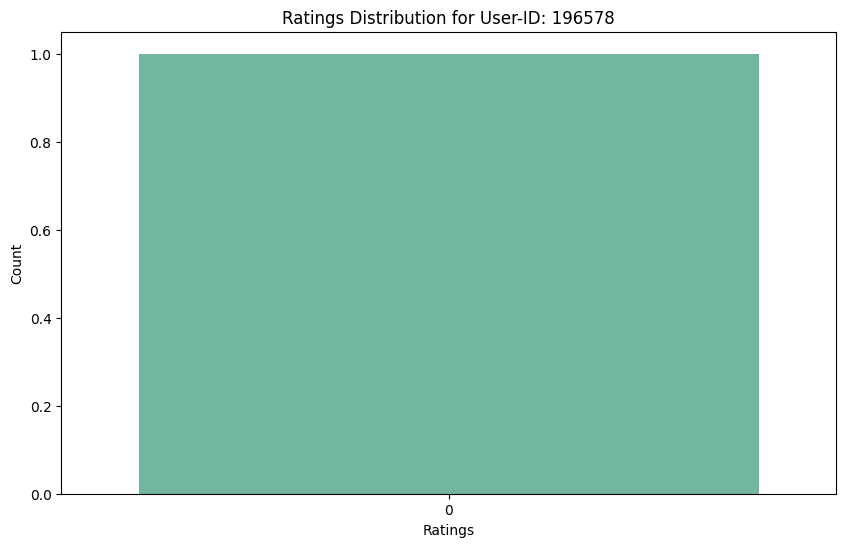

In [ ]:
# code  for this User-ID: 196578 give  rating and its graphical view
user_ratings = df5[df5['User-ID'] == 196578]
ratings_count = user_ratings['Book-Rating'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=ratings_count.index, y=ratings_count.values, palette='Set2')
plt.title('Ratings Distribution for User-ID: 196578')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [ ]:
# showing  the count of those user id which is repeated below 2 time

df5['User-ID'].value_counts()[df5['User-ID'].value_counts() <= 2].count()


62082

Most repeated ISBN: 0971880107
Number of times repeated: 2502

Least repeated ISBN: 0684814293
Number of times repeated: 1


<ipython-input-80-56017e88eac8>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_repeated_isbn_ratings.index, y=most_repeated_isbn_ratings.values, palette='Set2')


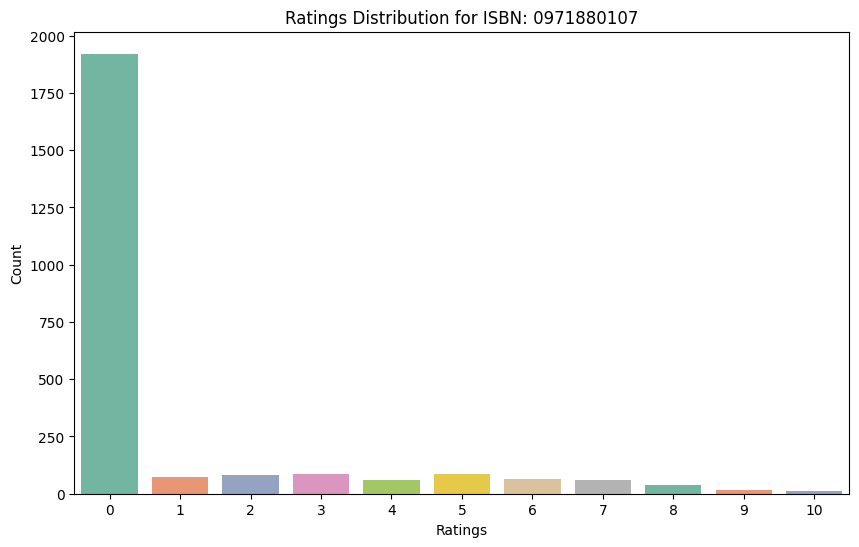

<ipython-input-80-56017e88eac8>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=least_repeated_isbn_ratings.index, y=least_repeated_isbn_ratings.values, palette='Set2')


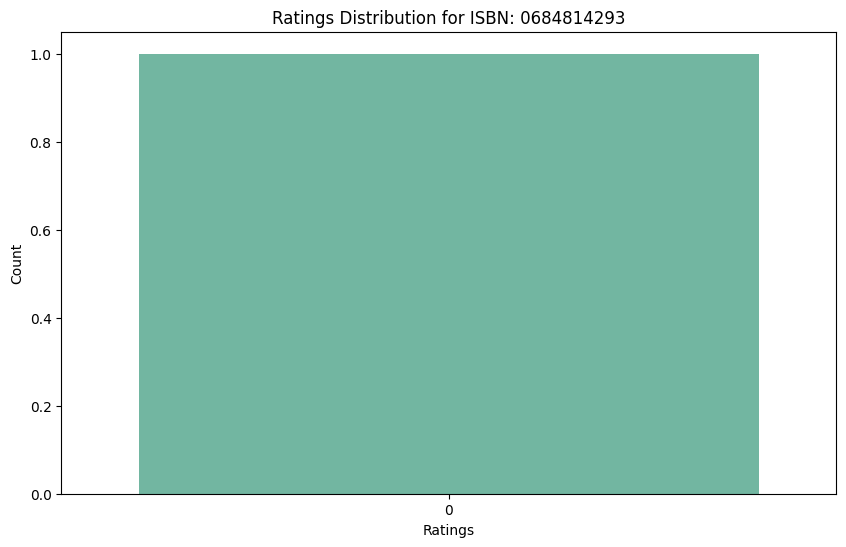

In [ ]:
#the most and least  repeated isbn  and  separate  graphical view

# Most repeated ISBN
most_repeated_isbn = df5['ISBN'].value_counts().idxmax()
number_of_times_repeated = df5['ISBN'].value_counts().max()

print(f"Most repeated ISBN: {most_repeated_isbn}")
print(f"Number of times repeated: {number_of_times_repeated}")

# Least repeated ISBN
least_repeated_isbn = df5['ISBN'].value_counts().idxmin()
number_of_times_repeated = df5['ISBN'].value_counts().min()

print(f"\nLeast repeated ISBN: {least_repeated_isbn}")
print(f"Number of times repeated: {number_of_times_repeated}")

# Graphical view for most repeated ISBN
most_repeated_isbn_ratings = df5[df5['ISBN'] == most_repeated_isbn]['Book-Rating'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=most_repeated_isbn_ratings.index, y=most_repeated_isbn_ratings.values, palette='Set2')
plt.title(f'Ratings Distribution for ISBN: {most_repeated_isbn}')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

# Graphical view for least repeated ISBN
least_repeated_isbn_ratings = df5[df5['ISBN'] == least_repeated_isbn]['Book-Rating'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=least_repeated_isbn_ratings.index, y=least_repeated_isbn_ratings.values, palette='Set2')
plt.title(f'Ratings Distribution for ISBN: {least_repeated_isbn}')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()


Top 10 locations with the most User-IDs:
Location
toronto, ontario, canada         14782
n/a, n/a, n/a                    11162
chicago, illinois, usa            8499
seattle, washington, usa          8392
ottawa, ontario, canada           8116
olympia, washington, usa          7871
omaha, nebraska, usa              7228
st. louis, missouri, usa          7225
little canada, minnesota, usa     6458
duluth, minnesota, usa            6218
Name: count, dtype: int64


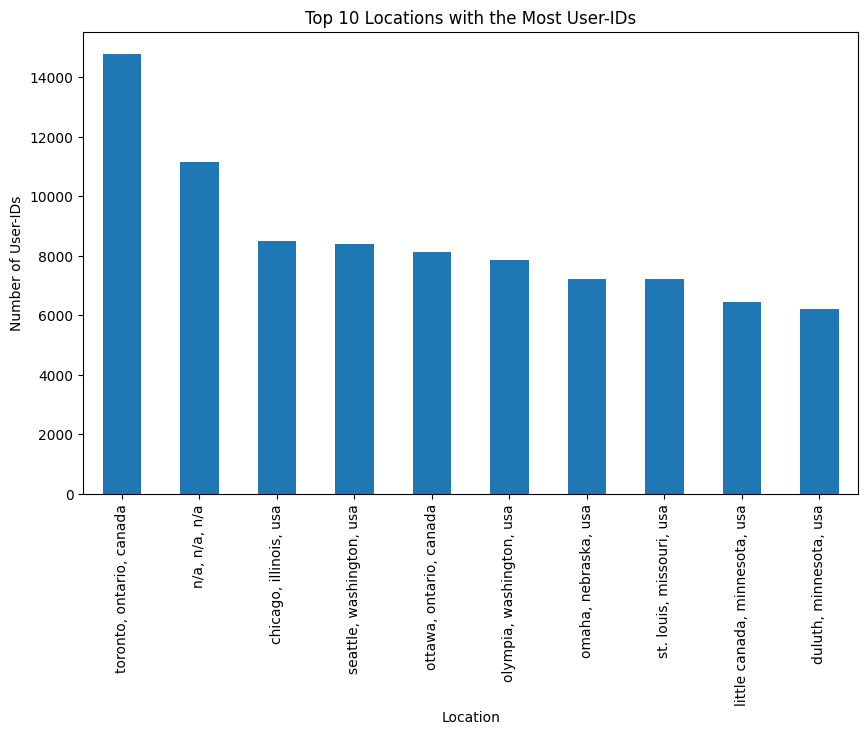

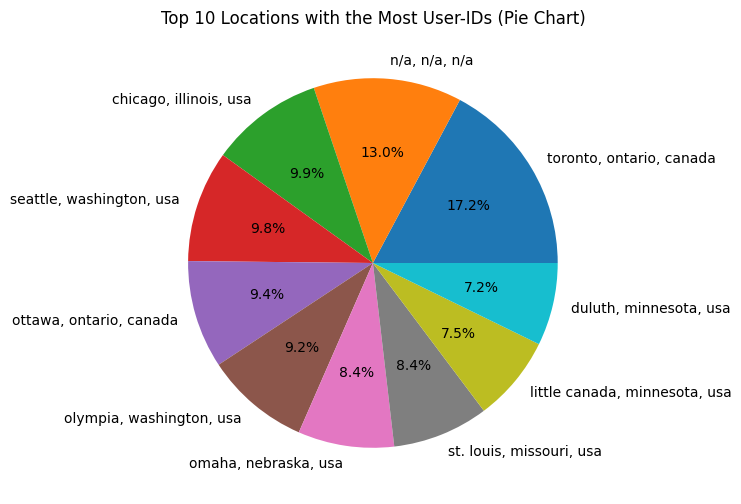


Least 10 locations with the least User-IDs:
Location
portel, alentejo, portugal             1
pville, maryland, usa                  1
stadthagen, niedersachsen, germany     1
london, middx,                         1
maple hts, ohio, usa                   1
christchurch, cantabry, new zealand    1
cs, texas, usa                         1
clinton, arkansas, usa                 1
beaverbank, nova scotia, canada        1
victoria, delaware, canada             1
Name: count, dtype: int64


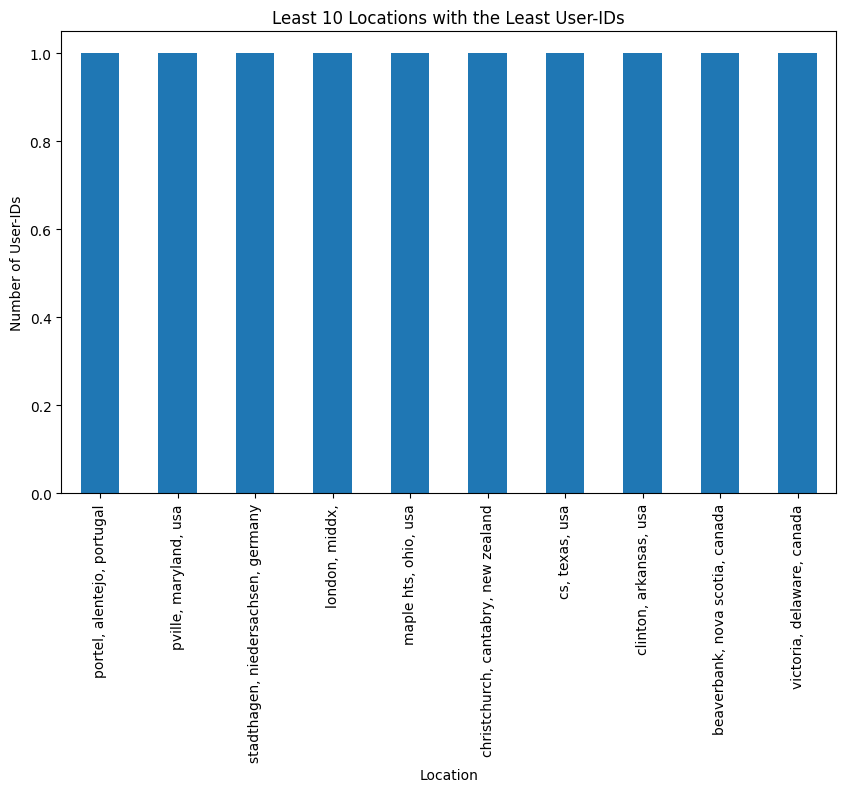

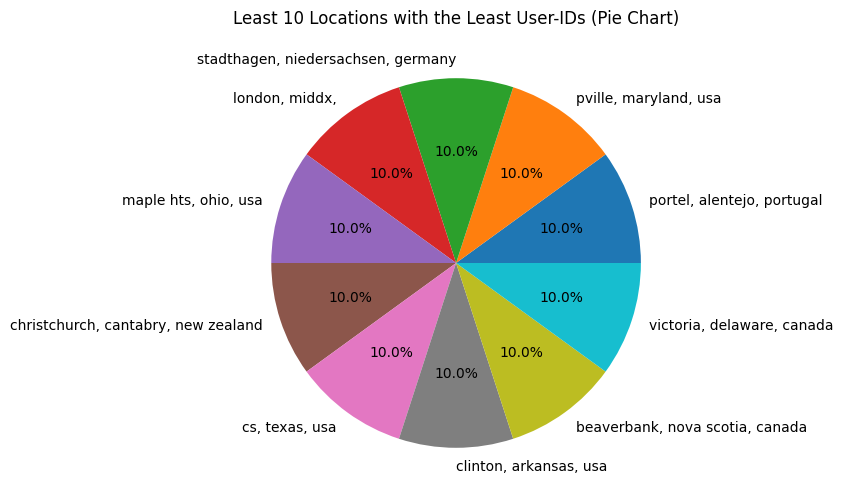


Top 10 locations with the most ISBNs:
Location
toronto, ontario, canada         14782
n/a, n/a, n/a                    11162
chicago, illinois, usa            8499
seattle, washington, usa          8392
ottawa, ontario, canada           8116
olympia, washington, usa          7871
omaha, nebraska, usa              7228
st. louis, missouri, usa          7225
little canada, minnesota, usa     6458
duluth, minnesota, usa            6218
Name: count, dtype: int64


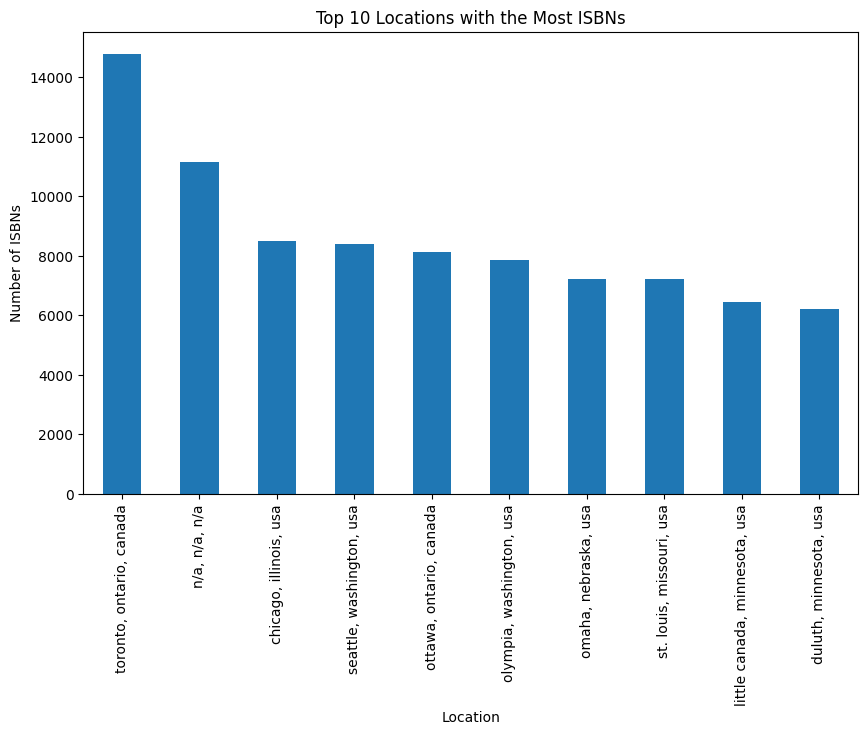

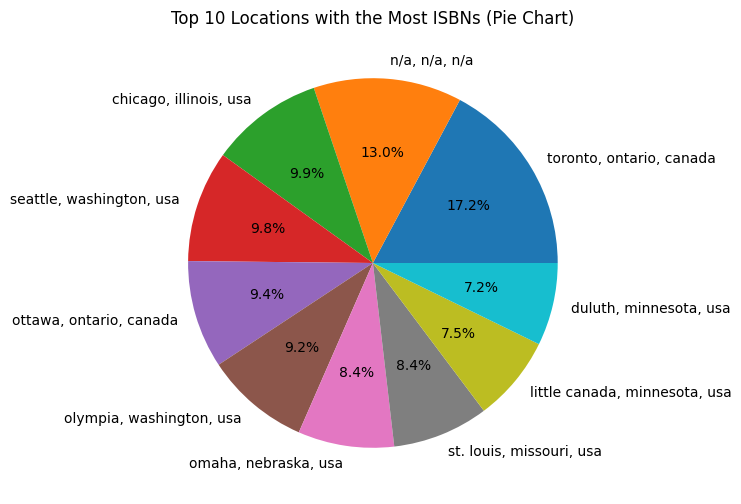


Least 10 locations with the least ISBNs:
Location
portel, alentejo, portugal             1
pville, maryland, usa                  1
stadthagen, niedersachsen, germany     1
london, middx,                         1
maple hts, ohio, usa                   1
christchurch, cantabry, new zealand    1
cs, texas, usa                         1
clinton, arkansas, usa                 1
beaverbank, nova scotia, canada        1
victoria, delaware, canada             1
Name: count, dtype: int64


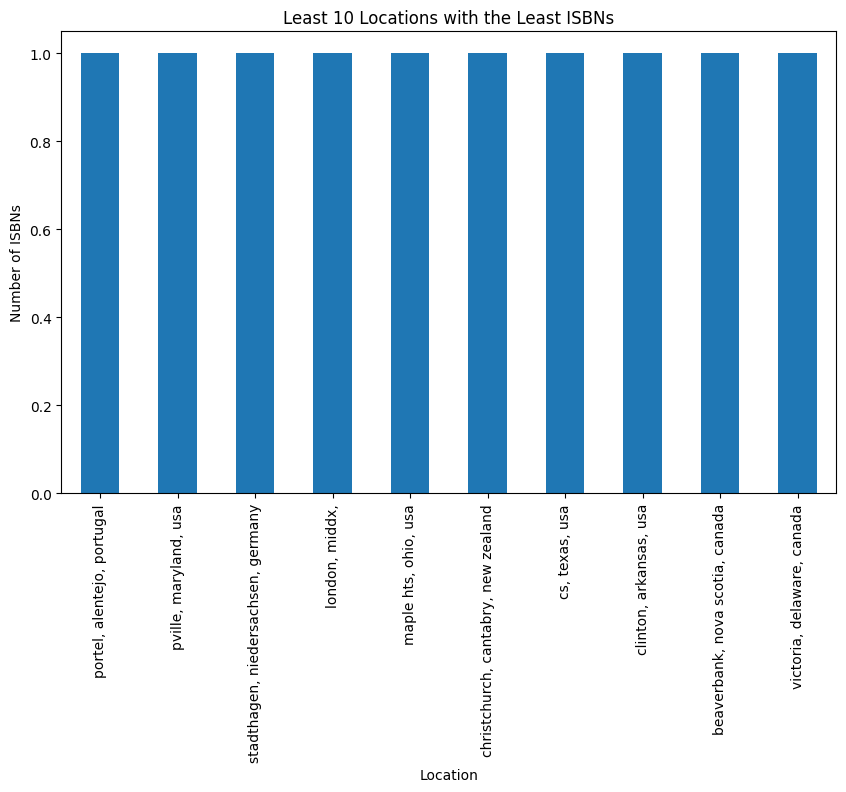

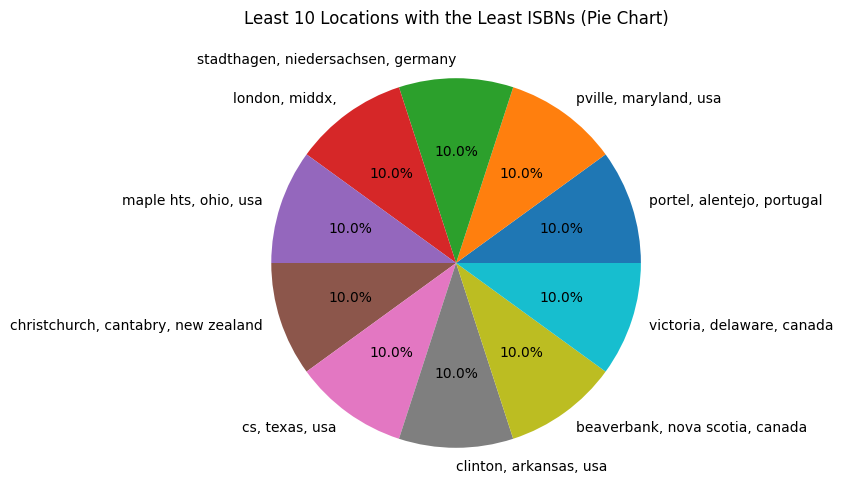

In [ ]:
#  showing  the 2 different  chart of  top 10  and least 10 location on the besis of userid and isbn no

# Top 10 locations with the most User-IDs
top_10_user_locations = df5['Location'].value_counts().head(10)

# Print the top 10 locations
print("Top 10 locations with the most User-IDs:")
print(top_10_user_locations)

# Creating a bar chart of the top 10 locations
plt.figure(figsize=(10, 6))
top_10_user_locations.plot(kind='bar')
plt.title('Top 10 Locations with the Most User-IDs')
plt.xlabel('Location')
plt.ylabel('Number of User-IDs')
plt.show()

# Create a pie chart of the top 10 locations
plt.figure(figsize=(10, 6))
plt.pie(top_10_user_locations, labels=top_10_user_locations.index, autopct='%1.1f%%')
plt.title('Top 10 Locations with the Most User-IDs (Pie Chart)')
plt.show()

# Least 10 locations with the least User-IDs
least_10_user_locations = df5['Location'].value_counts().tail(10)

# Print the least 10 locations
print("\nLeast 10 locations with the least User-IDs:")
print(least_10_user_locations)

# Creating a bar chart of the least 10 locations
plt.figure(figsize=(10, 6))
least_10_user_locations.plot(kind='bar')
plt.title('Least 10 Locations with the Least User-IDs')
plt.xlabel('Location')
plt.ylabel('Number of User-IDs')
plt.show()

# Create a pie chart of the least 10 locations
plt.figure(figsize=(10, 6))
plt.pie(least_10_user_locations, labels=least_10_user_locations.index, autopct='%1.1f%%')
plt.title('Least 10 Locations with the Least User-IDs (Pie Chart)')
plt.show()

# Top 10 locations with the most ISBNs
top_10_isbn_locations = df5['Location'].value_counts().head(10)

# Print the top 10 locations
print("\nTop 10 locations with the most ISBNs:")
print(top_10_isbn_locations)

# Creating a bar chart of the top 10 locations
plt.figure(figsize=(10, 6))
top_10_isbn_locations.plot(kind='bar')
plt.title('Top 10 Locations with the Most ISBNs')
plt.xlabel('Location')
plt.ylabel('Number of ISBNs')
plt.show()

# Create a pie chart of the top 10 locations
plt.figure(figsize=(10, 6))
plt.pie(top_10_isbn_locations, labels=top_10_isbn_locations.index, autopct='%1.1f%%')
plt.title('Top 10 Locations with the Most ISBNs (Pie Chart)')
plt.show()

# Least 10 locations with the least ISBNs
least_10_isbn_locations = df5['Location'].value_counts().tail(10)

# Print the least 10 locations
print("\nLeast 10 locations with the least ISBNs:")
print(least_10_isbn_locations)

# Creating a bar chart of the least 10 locations
plt.figure(figsize=(10, 6))
least_10_isbn_locations.plot(kind='bar')
plt.title('Least 10 Locations with the Least ISBNs')
plt.xlabel('Location')
plt.ylabel('Number of ISBNs')
plt.show()

# Create a pie chart of the least 10 locations
plt.figure(figsize=(10, 6))
plt.pie(least_10_isbn_locations, labels=least_10_isbn_locations.index, autopct='%1.1f%%')
plt.title('Least 10 Locations with the Least ISBNs (Pie Chart)')
plt.show()

Top 10 Authors with the Highest Average Ratings:
Book-Author
Bryan Cooper               10.0
Michelle Devlin            10.0
Richard Muhlberger         10.0
Ryan Stattelman            10.0
Michelle Gibson            10.0
Leo Rutherford             10.0
Michelle Foerder           10.0
Charlotte Benton           10.0
D. Stephenson              10.0
Charlotte Ann Foryan       10.0
Walter Potter              10.0
Tom Folley                 10.0
Martin Goldstein           10.0
Martin Goldstein D.V.M.    10.0
Nancy Johnson              10.0
R Croucher                 10.0
F. L. Griffith             10.0
Paul Rand                  10.0
D. S. Lliteras             10.0
Sue Corbett                10.0
Name: Book-Rating, dtype: float64


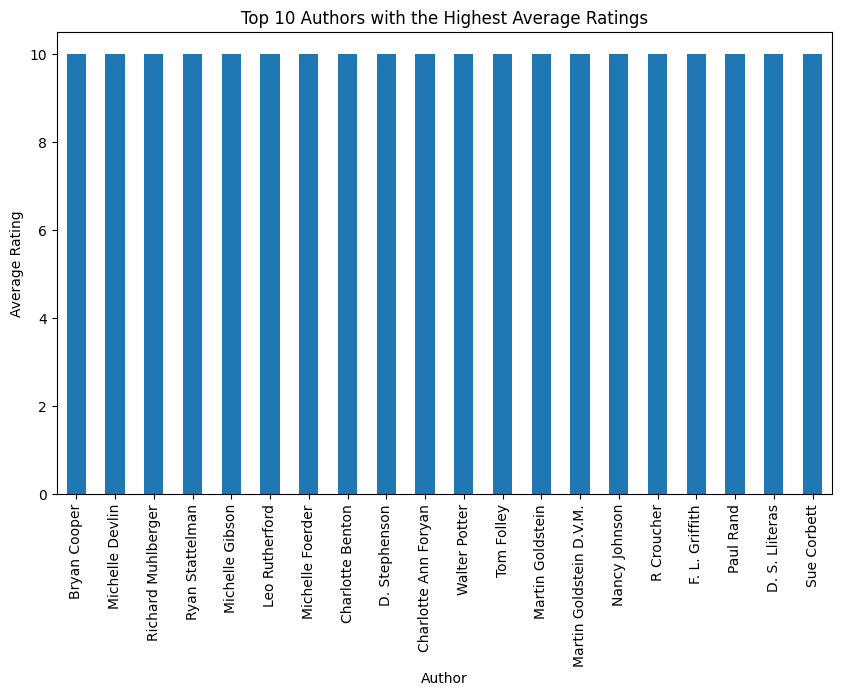

In [ ]:
#  showing the code to check the which author getting more rating  in graph as well

# Calculate the average rating for each author
average_ratings = df5.groupby('Book-Author')['Book-Rating'].mean()

# Sort the authors by average rating in descending order
top_rated_authors = average_ratings.sort_values(ascending=False)

# Select the top 10 authors
top_10_authors = top_rated_authors.head(20)

# Print the top 10 authors and their average ratings
print("Top 10 Authors with the Highest Average Ratings:")
print(top_10_authors)

# Create a bar chart of the top 10 authors
plt.figure(figsize=(10, 6))
top_10_authors.plot(kind='bar')
plt.title('Top 10 Authors with the Highest Average Ratings')
plt.xlabel('Author')
plt.ylabel('Average Rating')
plt.show()


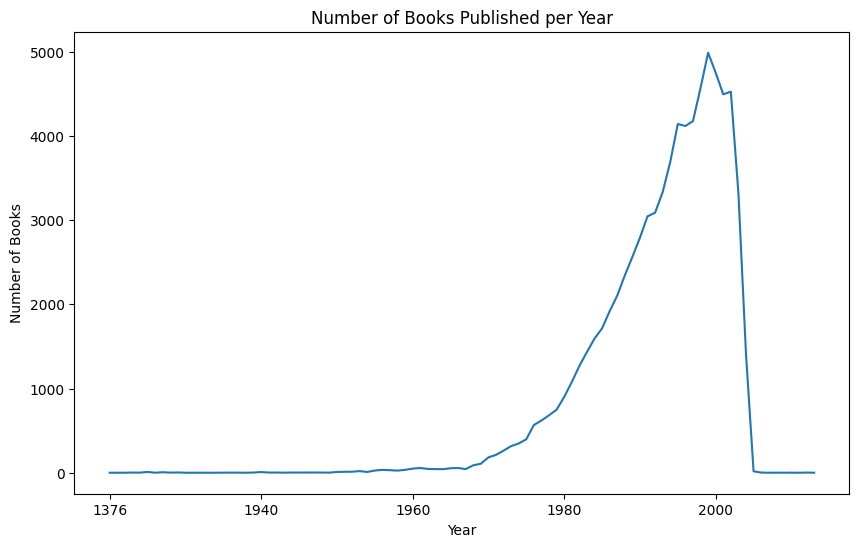

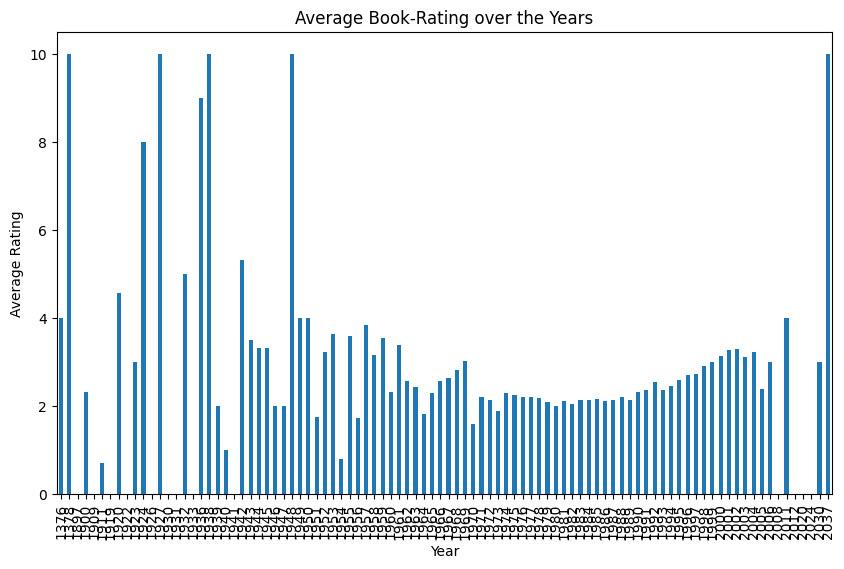

In [ ]:
# Line plot to show number books published per year wise

# Extract the year from the 'Year-Of-Publication' column
df5['Year'] = df5['Year-Of-Publication'].str.extract(r'(\d{4})', expand=False)

# Group the data by year and count the number of books published
grouped_data = df5.groupby('Year')['ISBN'].count()

# Create a line plot
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='line')
plt.title('Number of Books Published per Year')
plt.xlabel('Year')
plt.ylabel('Number of Books')
plt.show()


# Bar plot to show average Book-Rating over the years

# Group the data by year and calculate the average rating
average_ratings = df5.groupby('Year')['Book-Rating'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
average_ratings.plot(kind='bar')
plt.title('Average Book-Rating over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

In [ ]:
# checking the most repeated author in  below 35 ages

df5_under_35 = df5[df5['Age'] < 35]
most_repeated_author = df5_under_35['Book-Author'].value_counts().idxmax()
print(f"Most repeated author under 35: {most_repeated_author}")


Most repeated author under 35: Stephen King


In [ ]:
#showing how many books written by Stephen King with average rating

average_rating = df5[df5['Book-Author'] == 'Stephen King']['Book-Rating'].mean()
books_count = df5[df5['Book-Author'] == 'Stephen King']['Book-Author'].count()
print(f"Average rating for books by Stephen King: {average_rating}")
print(f"Number of books written by Stephen King: {books_count}")


Average rating for books by Stephen King: 3.606286680592858
Number of books written by Stephen King: 10053


In [ ]:
# checking the most repeated author in  above 35 ages

df5_under_35 = df5[df5['Age'] > 35]
most_repeated_author = df5_under_35['Book-Author'].value_counts().idxmax()
print(f"Most repeated author above 35: {most_repeated_author}")

Most repeated author above 35: Nora Roberts


In [ ]:
# showing how many books written by Nora Roberts with average rating

average_rating = df5[df5['Book-Author'] == 'Nora Roberts']['Book-Rating'].mean()
books_count = df5[df5['Book-Author'] == 'Nora Roberts']['Book-Author'].count()
print(f"Average rating for books by Nora Roberts: {average_rating}")
print(f"Number of books written by Nora Roberts: {books_count}")


Average rating for books by Nora Roberts: 2.65939020049828
Number of books written by Nora Roberts: 8429


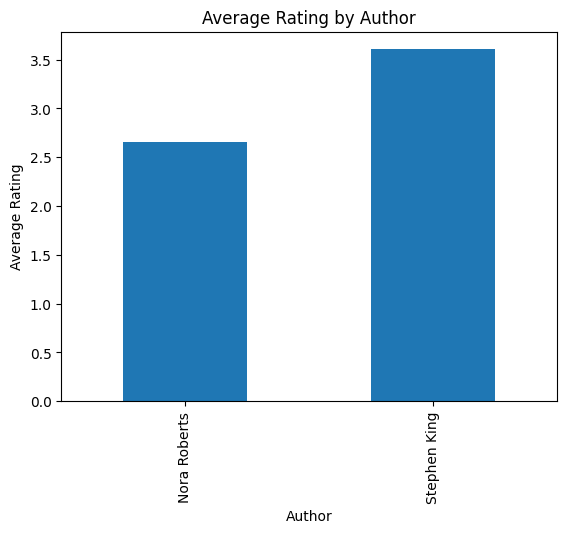

In [ ]:
#  showing Nora Roberts and Stephen King book-rating barchart

# Create a DataFrame for Stephen King and Nora Roberts books
df_authors = df5[df5['Book-Author'].isin(['Stephen King', 'Nora Roberts'])]

# Group the DataFrame by Author and calculate the average rating
average_ratings = df_authors.groupby('Book-Author')['Book-Rating'].mean()

# Create a bar chart of the average ratings
average_ratings.plot(kind='bar')
plt.title('Average Rating by Author')
plt.xlabel('Author')
plt.ylabel('Average Rating')
plt.show()


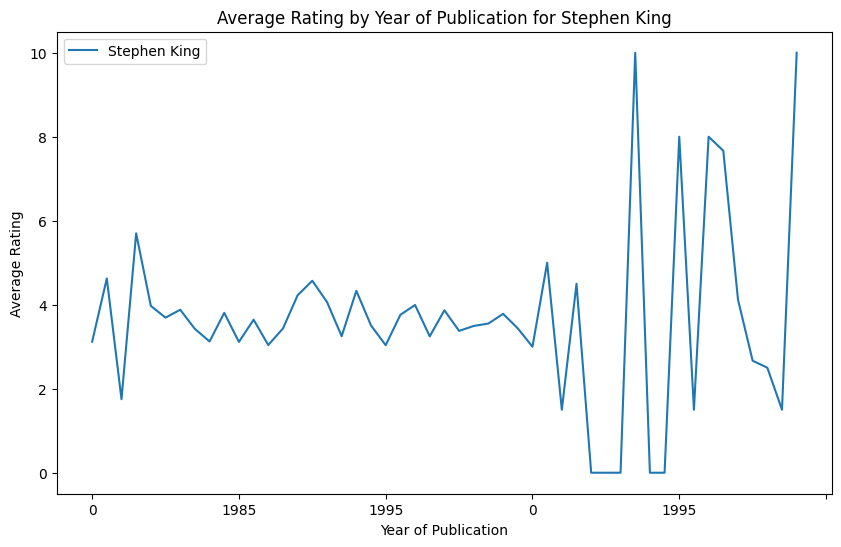

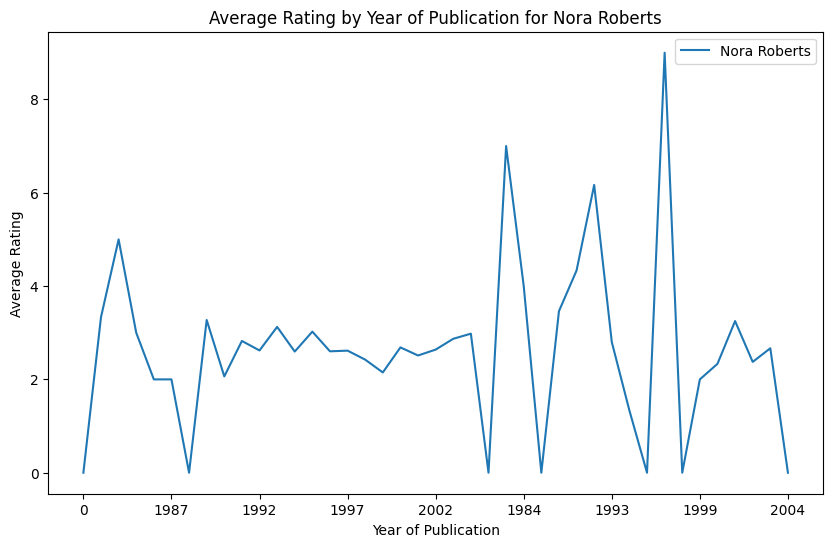

In [ ]:
# showing Nora Roberts and Stephen King  year of publication line chart seperately

# Create two separate DataFrames for Stephen King and Nora Roberts books
df_stephen_king = df5[df5['Book-Author'] == 'Stephen King']
df_nora_roberts = df5[df5['Book-Author'] == 'Nora Roberts']

# Group the DataFrames by Year-Of-Publication and calculate the average rating
average_ratings_stephen_king = df_stephen_king.groupby('Year-Of-Publication')['Book-Rating'].mean()
average_ratings_nora_roberts = df_nora_roberts.groupby('Year-Of-Publication')['Book-Rating'].mean()

# Create two separate line charts
plt.figure(figsize=(10, 6))
average_ratings_stephen_king.plot(kind='line', label='Stephen King')
plt.title('Average Rating by Year of Publication for Stephen King')
plt.xlabel('Year of Publication')
plt.ylabel('Average Rating')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
average_ratings_nora_roberts.plot(kind='line', label='Nora Roberts')
plt.title('Average Rating by Year of Publication for Nora Roberts')
plt.xlabel('Year of Publication')
plt.ylabel('Average Rating')
plt.legend()
plt.show()


In [ ]:
# trying to show that location wise most repeated author list

# Create a pivot table to count the number of books by author for each location
author_location_counts = df5.pivot_table(index='Location', columns='Book-Author', values='ISBN', aggfunc='count').fillna(0)

# Select the top 5 authors for each location
top_5_authors_by_location = {}
for location in author_location_counts.index:
  top_5_authors_by_location[location] = author_location_counts.loc[location].sort_values(ascending=False).head(5)

# Print the top 5 authors for each location
for location, authors in top_5_authors_by_location.items():
  print(f"Top 5 Authors in {location}:")
  for author, count in authors.items():
    print(f"\t{author}: {count}")


<ipython-input-39-538935c65bbf>:4: PerformanceWarning: The following operation may generate 2283608320 cells in the resulting pandas object.
  author_location_counts = df5.pivot_table(index='Location', columns='Book-Author', values='ISBN', aggfunc='count').fillna(0)


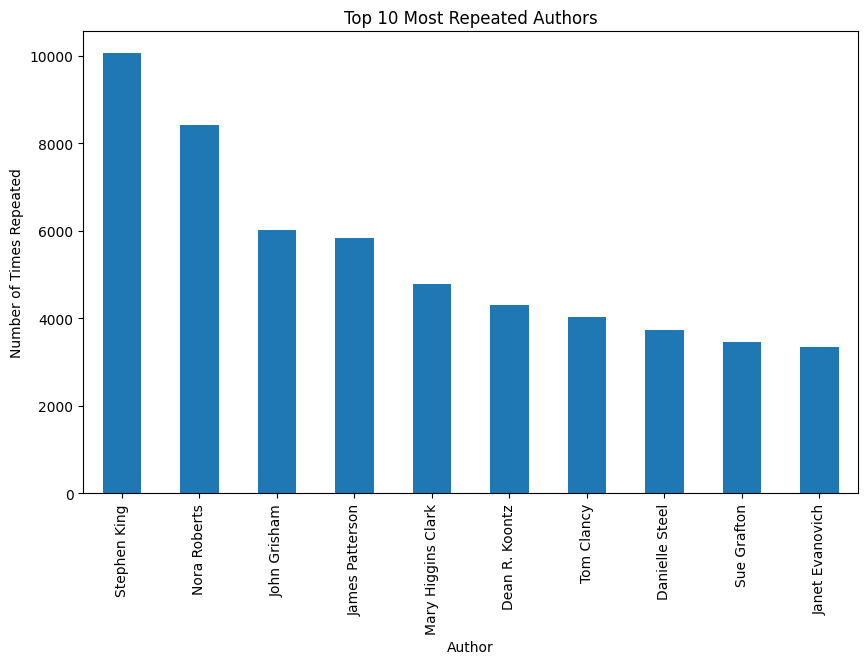

In [ ]:
# showing the top 10  most repeated 	Book-Author  and how many  time repeated  in bar plot

# Calculate the number of times each author appears in the dataset
author_counts = df5['Book-Author'].value_counts()

# Select the top 10 most repeated authors
top_10_authors = author_counts.head(10)

# Create a bar chart of the top 10 most repeated authors
plt.figure(figsize=(10, 6))
top_10_authors.plot(kind='bar')
plt.title('Top 10 Most Repeated Authors')
plt.xlabel('Author')
plt.ylabel('Number of Times Repeated')
plt.show()


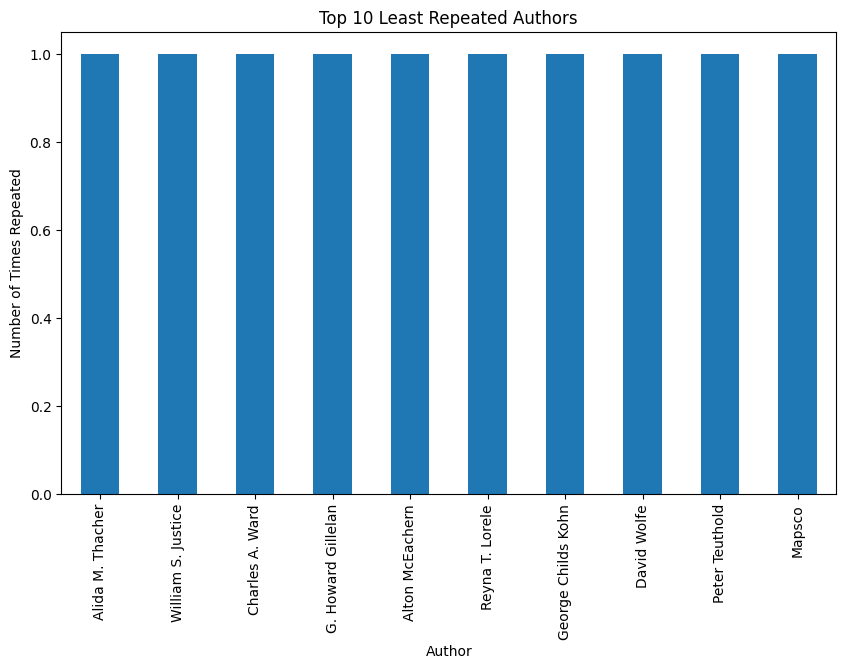

In [ ]:
# showing the top 10  least repeated 	Book-Author  and how many  time repeated  in bar plot

# Calculate the number of times each author appears in the dataset
author_counts = df5['Book-Author'].value_counts()

# Select the top 10 least repeated authors
least_10_authors = author_counts.tail(10)

# Create a bar chart of the top 10 least repeated authors
plt.figure(figsize=(10, 6))
least_10_authors.plot(kind='bar')
plt.title('Top 10 Least Repeated Authors')
plt.xlabel('Author')
plt.ylabel('Number of Times Repeated')
plt.show()


In [ ]:
# showing the count that how many Book-Author repeated  for 1 time

# Count the number of times each author appears in the dataset
author_counts = df5['Book-Author'].value_counts()

# Select the authors that appear only once
authors_repeated_once = author_counts[author_counts == 1]

# Print the number of authors that appear only once
print(f"Number of authors repeated only once: {len(authors_repeated_once)}")


Number of authors repeated only once: 49275


In [ ]:
df5.head()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Age_winsorized
0,2,"stockton, california, usa",18,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,18
1,8,"timmins, ontario, canada",37,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,37
2,11400,"ottawa, ontario, canada",49,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,49
3,11676,"n/a, n/a, n/a",37,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,37
4,41385,"sudbury, ontario, canada",37,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,37


In [ ]:
# selecting a random user id and show the count how many ISBN no linked with that user id

import random

# Select a random user ID
random_user_id = random.choice(df5['User-ID'].unique())

# Count the number of ISBNs linked to the user ID
isbn_count = df5[df5['User-ID'] == random_user_id]['ISBN'].nunique()

# Print the results
print(f"User ID: {random_user_id} has {isbn_count} ISBNs linked to it.")


User ID: 180083 has 2 ISBNs linked to it.


In [ ]:
# selecting a random user id and show the count how many ISBN no linked with that user id

import random

# Select a random user ID
random_user_id = random.choice(df5['User-ID'].unique())

# Count the number of ISBNs linked to the user ID
isbn_count = df5[df5['User-ID'] == random_user_id]['ISBN'].nunique()

# Print the results
print(f"User ID: {random_user_id} has {isbn_count} ISBNs linked to it.")

User ID: 234743 has 8 ISBNs linked to it.


In [ ]:
# selecting a random user id and show the count how many ISBN no linked with that user id

import random

# Select a random user ID
random_user_id = random.choice(df5['User-ID'].unique())

# Count the number of ISBNs linked to the user ID
isbn_count = df5[df5['User-ID'] == random_user_id]['ISBN'].nunique()

# Print the results
print(f"User ID: {random_user_id} has {isbn_count} ISBNs linked to it.")

User ID: 157444 has 1 ISBNs linked to it.


In [ ]:
df3['Image-URL-M'][1]

'http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg'

# Popularity Based Recommender System

In [2]:
ratings_with_name=df2.merge(df3,on='ISBN')
ratings_with_name.head(3)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [5]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,ÿ¿lpiraten.,2
241067,ÿ¿rger mit Produkt X. Roman.,4
241068,ÿ¿sterlich leben.,1
241069,ÿ¿stlich der Berge.,3


In [3]:
avg_rating_df = ratings_with_name.groupby('Book-Title')['Book-Rating'].mean().round(2).reset_index()
avg_rating_df.rename(columns={'Book-Rating': 'avg_rating'}, inplace=True)
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00
4,Beyond IBM: Leadership Marketing and Finance ...,0.00
...,...,...
241066,ÿ¿lpiraten.,0.00
241067,ÿ¿rger mit Produkt X. Roman.,5.25
241068,ÿ¿sterlich leben.,7.00
241069,ÿ¿stlich der Berge.,2.67


In [6]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.25
1,Always Have Popsicles,1,0.00
2,Apple Magic (The Collector's series),1,0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.00
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.00
...,...,...,...
241066,ÿ¿lpiraten.,2,0.00
241067,ÿ¿rger mit Produkt X. Roman.,4,5.25
241068,ÿ¿sterlich leben.,1,7.00
241069,ÿ¿stlich der Berge.,3,2.67


In [6]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)

In [7]:
popular_df = popular_df.merge(df3,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]

In [8]:
popular_df['Image-URL-M'][0]

'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

In [9]:
popular_df.head(3)

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.85
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.82
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.74


# Collaborative Filtering Based Recommender System

In [10]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 150
x

User-ID
2         False
8         False
9         False
10        False
12        False
          ...  
278846    False
278849    False
278851    False
278852    False
278854    False
Name: Book-Rating, Length: 92106, dtype: bool

In [11]:
rated_users = x[x].index

In [12]:
x[x].index

Index([   254,   1733,   1903,   2033,   2110,   2276,   2766,   2891,   2977,
         3363,
       ...
       274301, 274308, 274808, 275970, 276680, 277427, 277478, 277639, 278188,
       278418],
      dtype='int64', name='User-ID', length=1115)

In [13]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(rated_users)]

In [14]:
filtered_rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
14,77480,034545104X,8,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031115,276680,0812881311,0,Streets of Gold,Evan Hunter,1985,Madison Books,http://images.amazon.com/images/P/0812881311.0...,http://images.amazon.com/images/P/0812881311.0...,http://images.amazon.com/images/P/0812881311.0...
1031116,276680,0865055041,0,Kitchen (Historic Communities (Paperback)),Bobbie Kalman,1990,Crabtree Publishing Company,http://images.amazon.com/images/P/0865055041.0...,http://images.amazon.com/images/P/0865055041.0...,http://images.amazon.com/images/P/0865055041.0...
1031117,276680,086505505X,0,Home Crafts (Historic Communities (Paperback)),Bobbie Kalman,1990,Crabtree Publishing Company,http://images.amazon.com/images/P/086505505X.0...,http://images.amazon.com/images/P/086505505X.0...,http://images.amazon.com/images/P/086505505X.0...
1031118,276680,1564407284,0,"The Old Sturbridge Village Cookbook, 2nd : Aut...",Caroline Sloat,1995,Globe Pequot,http://images.amazon.com/images/P/1564407284.0...,http://images.amazon.com/images/P/1564407284.0...,http://images.amazon.com/images/P/1564407284.0...


In [15]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [16]:
y[y].index

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       '84 Charing Cross Road',
       'A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action',
       ...
       'Without Remorse', 'Wizard and Glass (The Dark Tower, Book 4)',
       'Women Who Run with the Wolves',
       'Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players',
       'Wuthering Heights', 'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=868)

In [17]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [18]:
final_ratings.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
67,8253,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...


In [19]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [20]:
pt.fillna(0,inplace=True)
pt

User-ID,254,1733,1903,2033,2110,2276,2766,2891,2977,3363,...,274301,274308,274808,275970,276680,277427,277478,277639,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
from sklearn.metrics.pairwise import cosine_similarity

In [22]:
similarity_scores = cosine_similarity(pt)

In [23]:
similarity_scores

array([[1.        , 0.07980265, 0.00974903, ..., 0.09658948, 0.06448266,
        0.03549567],
       [0.07980265, 1.        , 0.25233692, ..., 0.06000464, 0.14873547,
        0.1435961 ],
       [0.00974903, 0.25233692, 1.        , ..., 0.03769791, 0.04493654,
        0.09205667],
       ...,
       [0.09658948, 0.06000464, 0.03769791, ..., 1.        , 0.06439035,
        0.01670749],
       [0.06448266, 0.14873547, 0.04493654, ..., 0.06439035, 1.        ,
        0.09936127],
       [0.03549567, 0.1435961 , 0.09205667, ..., 0.01670749, 0.09936127,
        1.        ]])

In [24]:
similarity_scores.shape

(868, 868)

In [25]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]

    data = []
    for i in similar_items:
        item = []
        temp_df = df3[df3['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))

        data.append(item)

    return data

In [26]:
recommend('Winter Solstice')

[['September',
  'Rosamunde Pilcher',
  'http://images.amazon.com/images/P/0312924801.01.MZZZZZZZ.jpg'],
 ['Coming Home',
  'Rosamunde Pilcher',
  'http://images.amazon.com/images/P/0312958129.01.MZZZZZZZ.jpg'],
 ["From Potter's Field",
  'Patricia Daniels Cornwell',
  'http://images.amazon.com/images/P/0425154092.01.MZZZZZZZ.jpg'],
 ['Deja Dead',
  'Kathy Reichs',
  'http://images.amazon.com/images/P/0671011367.01.MZZZZZZZ.jpg'],
 ['Montana Sky',
  'Nora Roberts',
  'http://images.amazon.com/images/P/0515120618.01.MZZZZZZZ.jpg']]

In [27]:
recommend('Zen and the Art of Motorcycle Maintenance: An Inquiry into Values')

[['Prodigal Summer',
  'Barbara Kingsolver',
  'http://images.amazon.com/images/P/0060199652.01.MZZZZZZZ.jpg'],
 ['Pet Sematary',
  'Stephen King',
  'http://images.amazon.com/images/P/0451162072.01.MZZZZZZZ.jpg'],
 ['Beloved',
  'Toni Morrison',
  'http://images.amazon.com/images/P/0452280621.01.MZZZZZZZ.jpg'],
 ['A Prayer for Owen Meany',
  'John Irving',
  'http://images.amazon.com/images/P/0345361792.01.MZZZZZZZ.jpg'],
 ["The Hitchhiker's Guide to the Galaxy",
  'Douglas Adams',
  'http://images.amazon.com/images/P/0671461494.01.MZZZZZZZ.jpg']]

In [59]:
recommend('Zoya')

[['Fine Things',
  'Danielle Steel',
  'http://images.amazon.com/images/P/0440200563.01.MZZZZZZZ.jpg'],
 ['Wings',
  'Terry Pratchett',
  'http://images.amazon.com/images/P/0385304366.01.MZZZZZZZ.jpg'],
 ['Secrets',
  'DANIELLE STEEL',
  'http://images.amazon.com/images/P/0440176484.01.MZZZZZZZ.jpg'],
 ['Jewels',
  'Danielle Steel',
  'http://images.amazon.com/images/P/044021422X.01.MZZZZZZZ.jpg'],
 ['Kaleidoscope',
  'June Stepansky',
  'http://images.amazon.com/images/P/0884092097.01.MZZZZZZZ.jpg']]

In [60]:
pt.index[599]

'The Bonfire of the Vanities'

In [61]:
df3.drop_duplicates('Book-Title')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271354,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993,Ballantine Books,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [12]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))


In [ ]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(df3,open('df3.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))